In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("E:\Datasets\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [4]:
feature_cols = ['pPregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insuline','BMI',
                'DiaPredFunc','Age']

In [5]:
# Imbalancing
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_res,y_res=sm.fit_resample(x,y)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [7]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score
dt= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dt.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [8]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
tr= dt.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = dt.predict(x_test)

In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6948051948051948


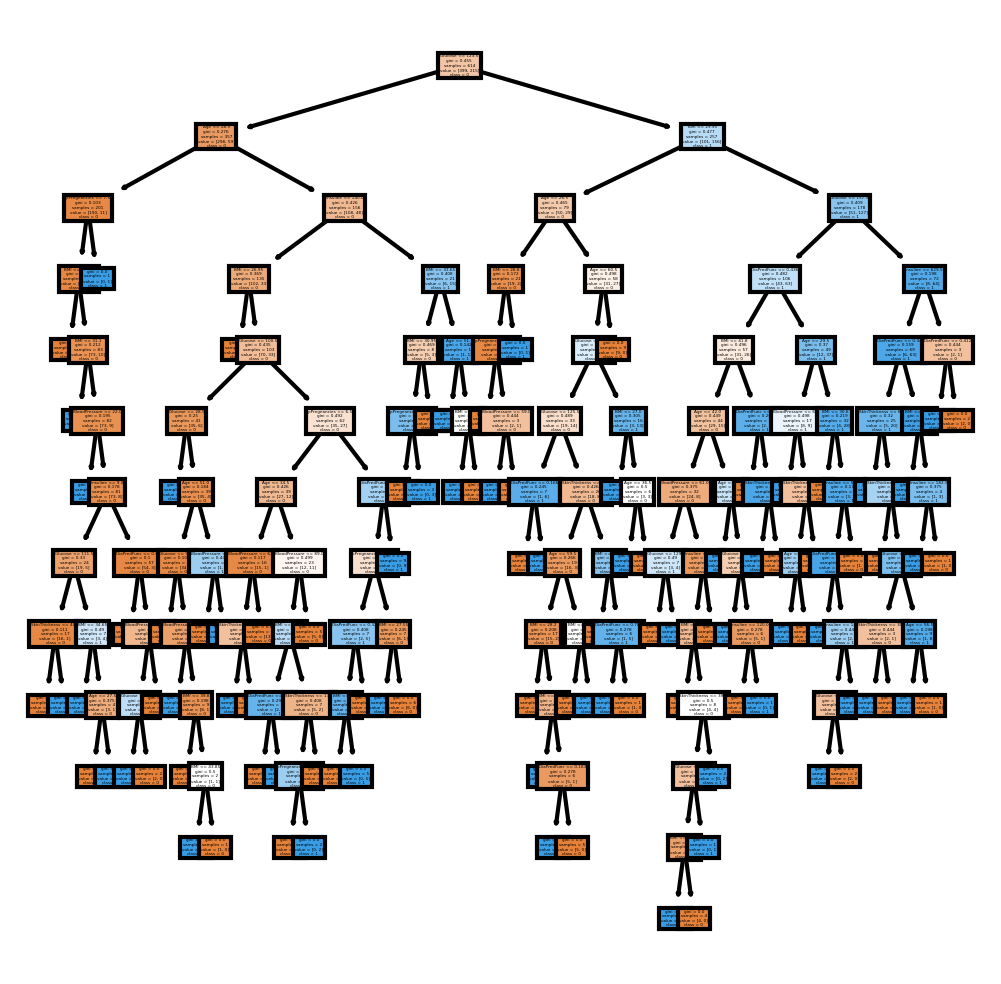

In [10]:
import matplotlib.pyplot as plt
import cv2
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dt,
           feature_names = feature_cols , 
           class_names= ['0','1'],
           filled = True);

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3,random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7272727272727273


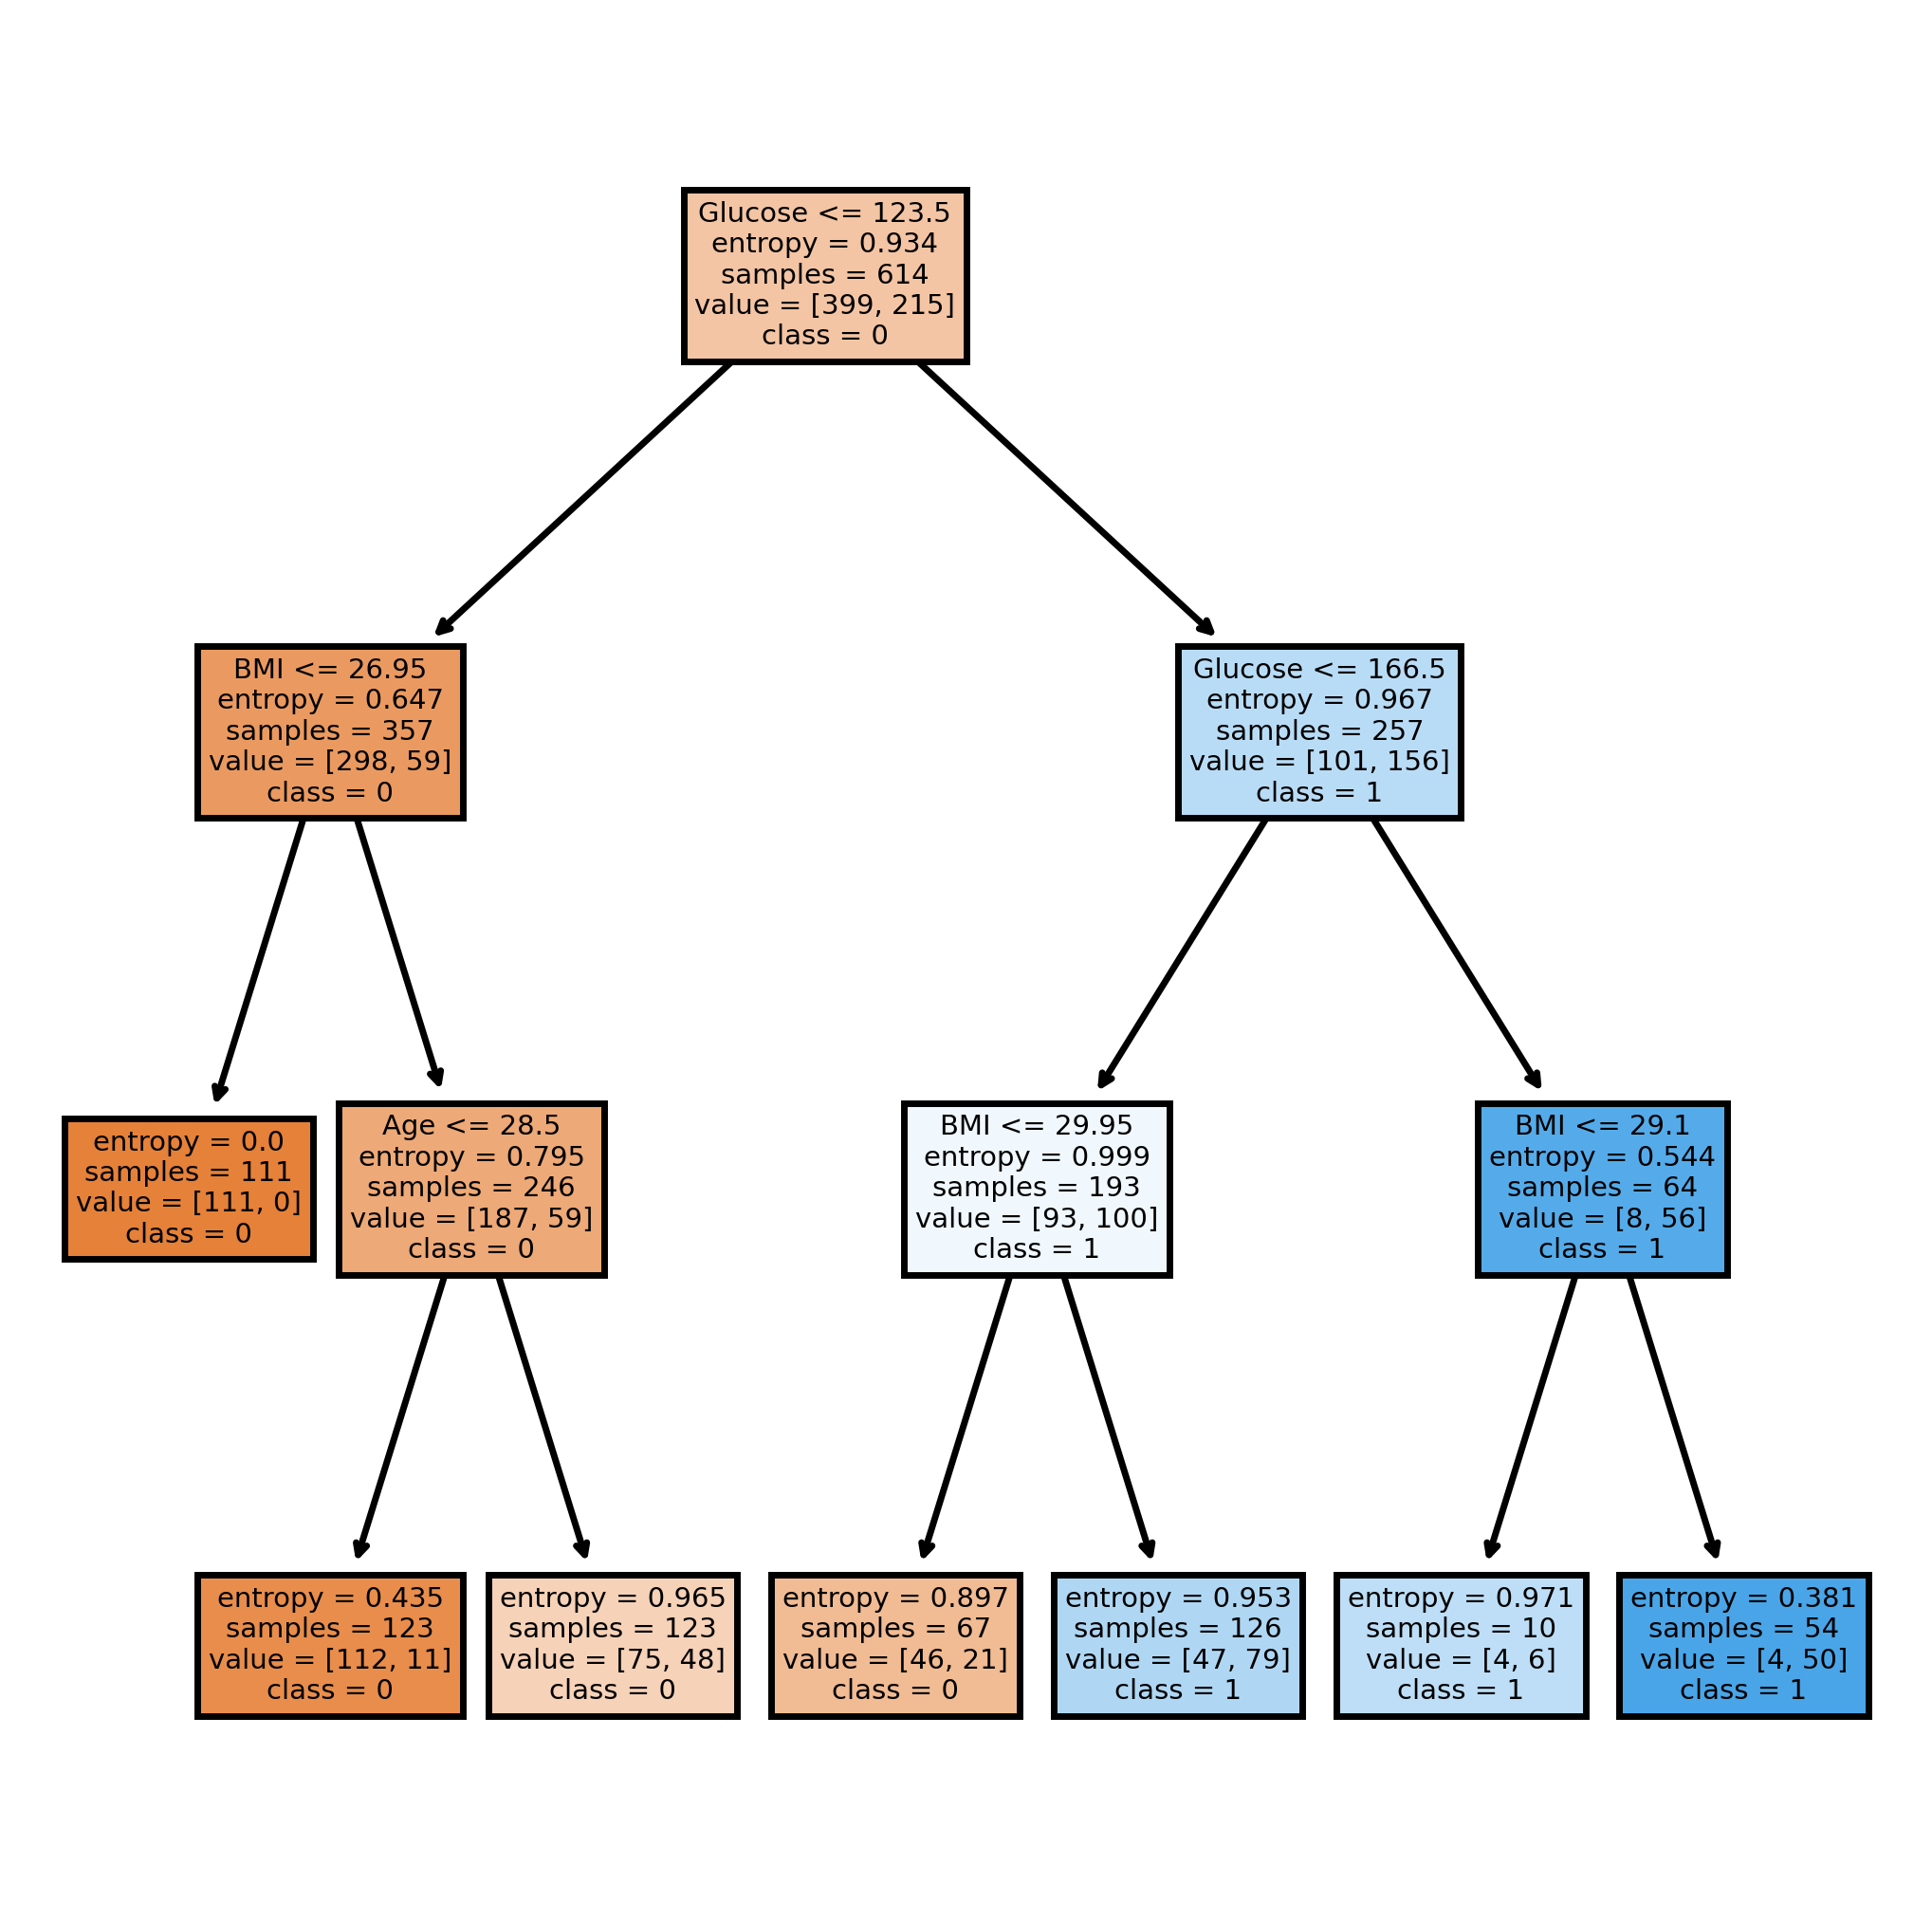

In [12]:
import matplotlib.pyplot as plt
import cv2
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=500)

tree.plot_tree(clf,
           feature_names = feature_cols , 
           class_names= ['0','1'],
           filled = True);

In [13]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 123.50
|   |--- feature_5 <= 26.95
|   |   |--- class: 0
|   |--- feature_5 >  26.95
|   |   |--- feature_7 <= 28.50
|   |   |   |--- class: 0
|   |   |--- feature_7 >  28.50
|   |   |   |--- class: 0
|--- feature_1 >  123.50
|   |--- feature_1 <= 166.50
|   |   |--- feature_5 <= 29.95
|   |   |   |--- class: 0
|   |   |--- feature_5 >  29.95
|   |   |   |--- class: 1
|   |--- feature_1 >  166.50
|   |   |--- feature_5 <= 29.10
|   |   |   |--- class: 1
|   |   |--- feature_5 >  29.10
|   |   |   |--- class: 1



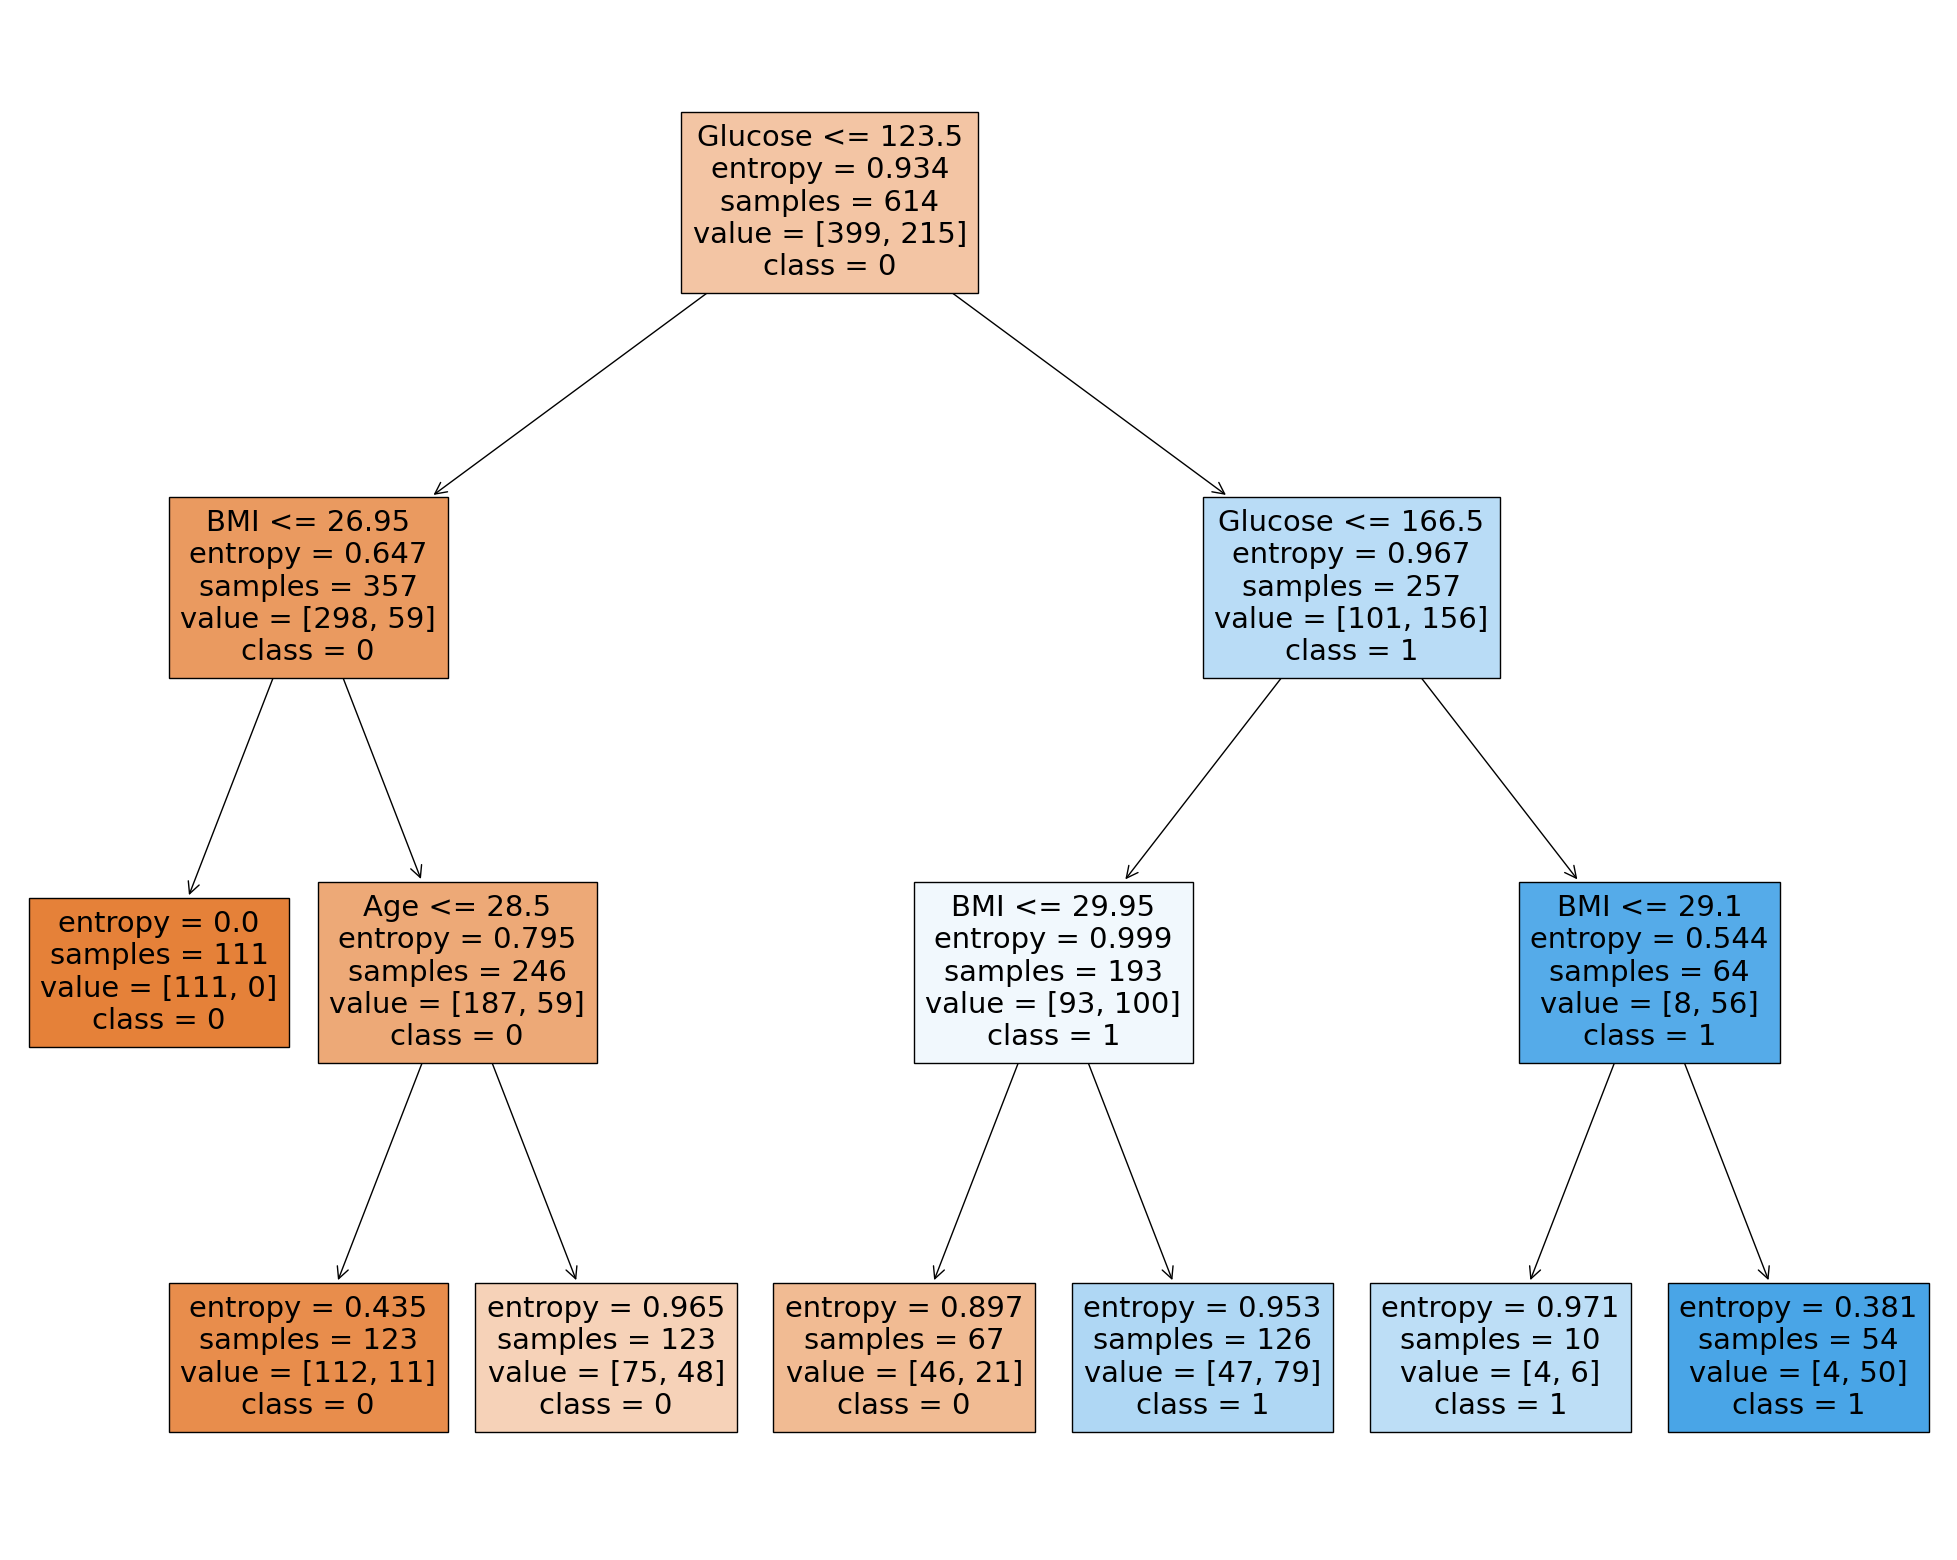

In [14]:
fig = plt.figure(figsize=(25,20))
d= tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names= ['0','1'],
                   filled=True)